In [1]:
import datacube
#dc = datacube.Datacube(env='sentinel2betatmp', config='/home/547/aw3463/.sent2.conf')
dc = datacube.Datacube()
query={'time': ('2014-01-01', '2014-12-31'),
 'lat': (-31.3517949155991, -31.3306800844009),
 'lon': (121.63706141083831, 121.65863075582836),
 'output_crs': 'EPSG:3577',
 'resampling': 'bilinear',
 'resolution': (-25.0, 25.0)}
b_names = ['nbar_coastal_aerosol', 'nbar_blue', 'nbar_green', 'nbar_red', 'nbar_red_edge_1', 'nbar_red_edge_2', 'nbar_red_edge_3', 'nbar_nir_1', 'nbar_nir_2', 'nbar_swir_2', 'nbar_swir_3']
#sat_array = dc.load(product='s2b_ard_granule', measurements=b_names, **query)
sat_array = dc.load(product='ls8_nbar_scene', **query)
sat_array.rename({'1': 'coastal_aerosol', '2': 'blue', '3': 'green', '4': 'red', '5': 'nir', '6': 'swir1', '7': 'swir2'}, inplace=True)


<xarray.Dataset>
Dimensions:          (time: 23, x: 90, y: 102)
Coordinates:
  * time             (time) datetime64[ns] 2014-01-05T01:48:16 ...
  * y                (y) float64 -3.452e+06 -3.452e+06 -3.452e+06 -3.452e+06 ...
  * x                (x) float64 -9.755e+05 -9.755e+05 -9.755e+05 -9.755e+05 ...
Data variables:
    coastal_aerosol  (time, y, x) int16 3032 3040 3054 3069 3080 3086 3094 ...
    blue             (time, y, x) int16 2821 2827 2836 2847 2862 2873 2879 ...
    green            (time, y, x) int16 3146 3156 3169 3187 3199 3210 3220 ...
    red              (time, y, x) int16 3270 3297 3314 3326 3342 3356 3364 ...
    nir              (time, y, x) int16 1473 1488 1508 1518 1535 1552 1570 ...
    swir1            (time, y, x) int16 45 45 46 46 45 45 44 45 43 46 45 43 ...
    swir2            (time, y, x) int16 32 34 35 35 33 32 33 34 34 33 32 31 ...
Attributes:
    crs:      EPSG:3577

In [2]:
durf = 100*sat_array.groupby('time').std()/sat_array.groupby('time').mean()

In [3]:
spee = durf.to_dataframe()


In [4]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9.5, 9.5))
spee.hist(ax=axes)

/g/data/v10/public/modules/dea-env/20180629/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba71f15f28>,
      dtype=object)

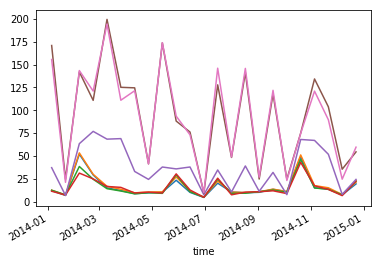

In [5]:
spee.plot(legend=False)


In [6]:
query={'time': ('2018-02-05', '2018-02-15'),
 'lat': (-30.595141582265763, -30.573900084400902),
 'lon': (115.14502132590322, 115.16618234076345),
 'output_crs': 'EPSG:3577',
 'resampling': 'bilinear',
 'resolution': (-25.0, 25.0)}
sat_array2 = dc.load(product='ls8_nbar_scene', **query)
sat_array2.rename({'1': 'coastal_aerosol', '2': 'blue', '3': 'green', '4': 'red', '5': 'nir', '6': 'swir1', '7': 'swir2'}, inplace=True)
sat_array2

<xarray.Dataset>
Dimensions:          (time: 1, x: 93, y: 106)
Coordinates:
  * time             (time) datetime64[ns] 2018-02-13T02:11:03.500000
  * y                (y) float64 -3.433e+06 -3.433e+06 -3.433e+06 -3.433e+06 ...
  * x                (x) float64 -1.595e+06 -1.595e+06 -1.595e+06 -1.595e+06 ...
Data variables:
    coastal_aerosol  (time, y, x) int16 968 831 520 506 547 534 512 539 600 ...
    blue             (time, y, x) int16 974 810 474 449 492 469 450 489 566 ...
    green            (time, y, x) int16 1241 1061 640 559 601 594 608 679 ...
    red              (time, y, x) int16 1377 1142 611 559 622 611 615 689 ...
    nir              (time, y, x) int16 3530 2930 2105 1838 1767 1701 1872 ...
    swir1            (time, y, x) int16 2971 2386 1505 1340 1511 1511 1611 ...
    swir2            (time, y, x) int16 1792 1443 881 771 863 851 898 1003 ...
Attributes:
    crs:      EPSG:3577

In [7]:
import DEAPlotting
#DEAPlotting.three_band_image(sat_array2, bands = ['red', 'green', 'blue'], time = 0, contrast_enhance=False)

In [8]:
dc2 = datacube.Datacube()
query={'time': ('2014-01-01', '2014-12-31'),
 'lat': (-31.3517949155991, -31.3306800844009),
 'lon': (121.63706141083831, 121.65863075582836),
 'output_crs': 'EPSG:3577',
 'resampling': 'bilinear',
 'resolution': (-25.0, 25.0)}
data = dc2.load(product='ls8_nbart_geomedian_annual', **query)
data

<xarray.Dataset>
Dimensions:  (time: 1, x: 90, y: 102)
Coordinates:
  * time     (time) datetime64[ns] 2014-01-01
  * y        (y) float64 -3.452e+06 -3.452e+06 -3.452e+06 -3.452e+06 ...
  * x        (x) float64 -9.755e+05 -9.755e+05 -9.755e+05 -9.755e+05 ...
Data variables:
    blue     (time, y, x) int16 4455 4465 4475 4486 4493 4493 4505 4304 4511 ...
    green    (time, y, x) int16 5113 5123 5130 5146 5159 5157 5160 4943 5186 ...
    red      (time, y, x) int16 5540 5547 5555 5573 5588 5587 5586 5314 5614 ...
    nir      (time, y, x) int16 4621 4617 4617 4653 4682 4675 4673 4119 4695 ...
    swir1    (time, y, x) int16 477 477 470 480 496 495 490 411 482 515 507 ...
    swir2    (time, y, x) int16 301 299 296 304 312 314 311 260 298 321 316 ...
Attributes:
    crs:      EPSG:3577

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fba70a409e8>)

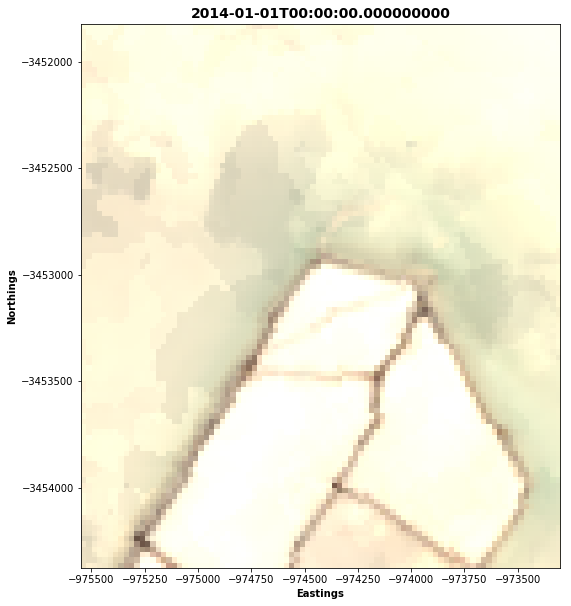

In [9]:
DEAPlotting.three_band_image(data, bands = ['red', 'green', 'blue'], time = 0, contrast_enhance=False)

In [10]:
del sat_array['coastal_aerosol']

In [11]:
diffo = sat_array - data.squeeze(dim='time')

xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset h

/g/data/v10/public/modules/dea-env/20180629/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step


/g/data/v10/public/modules/dea-env/20180629/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


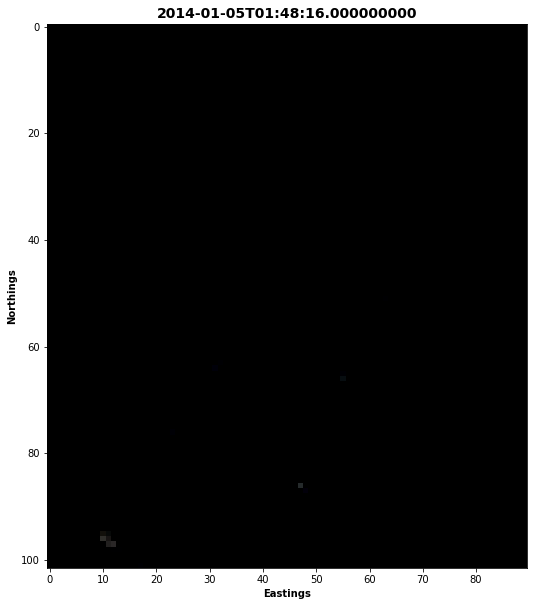

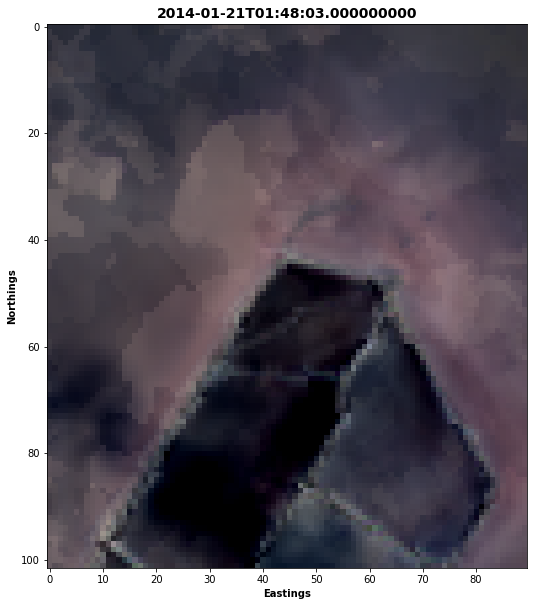

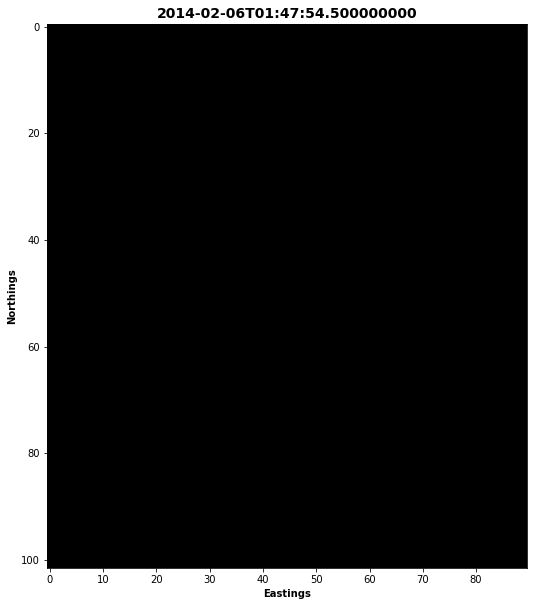

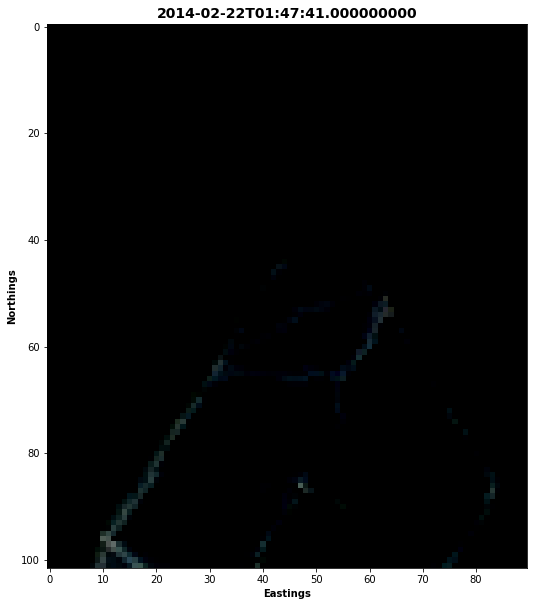

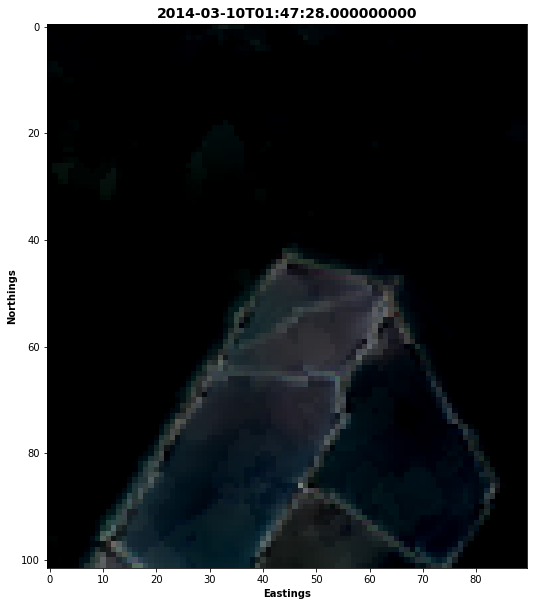

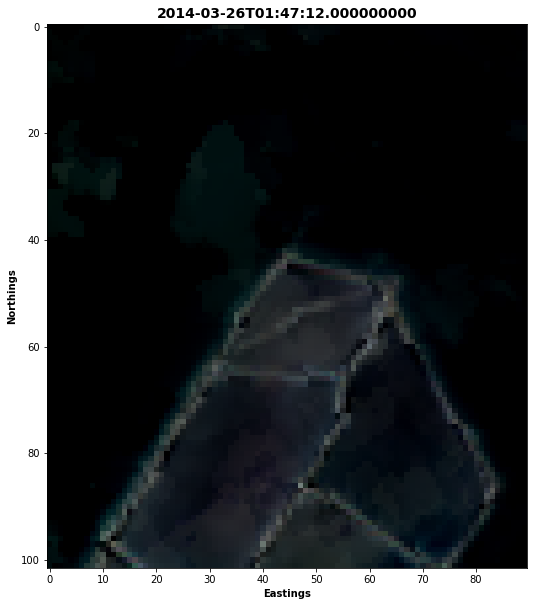

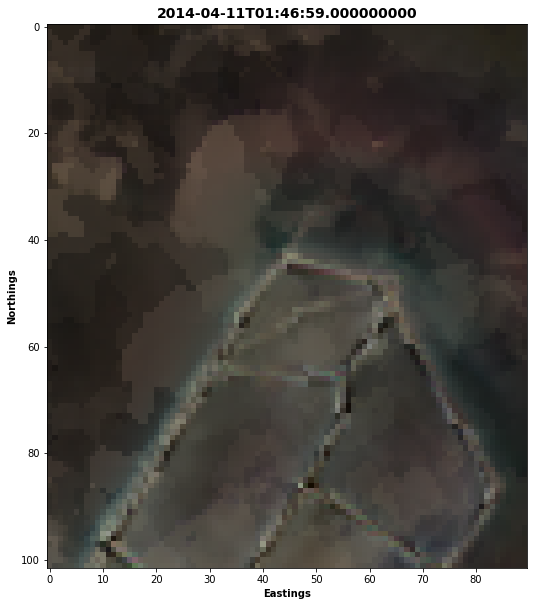

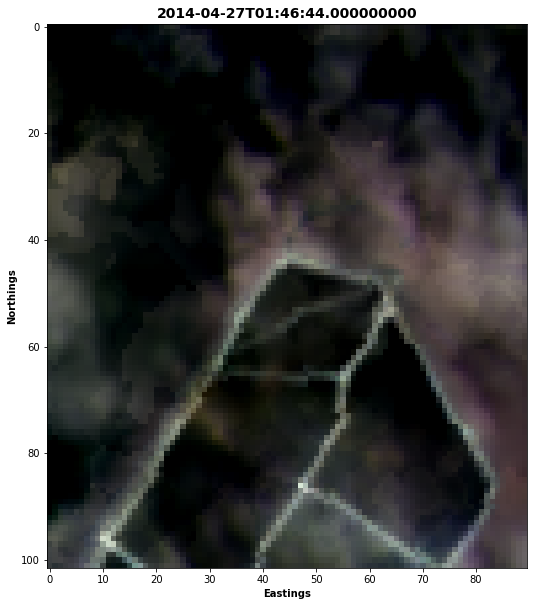

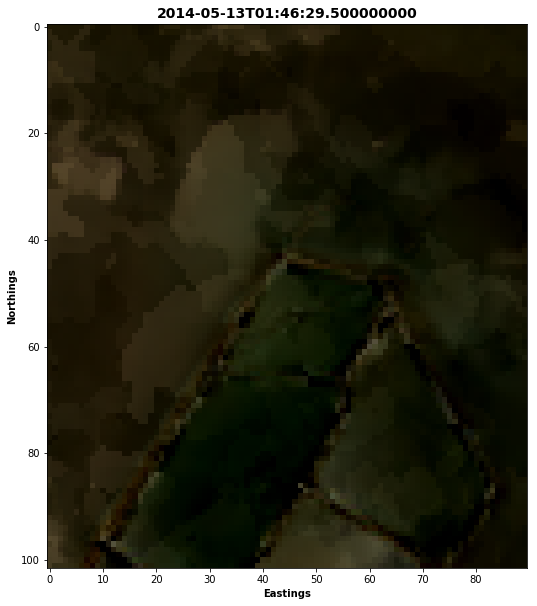

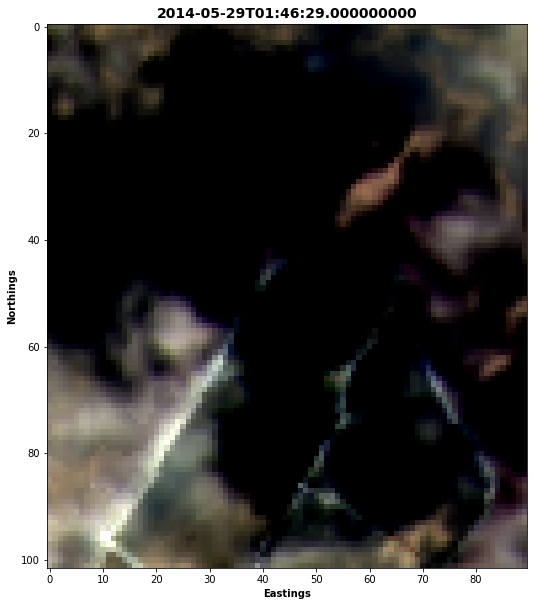

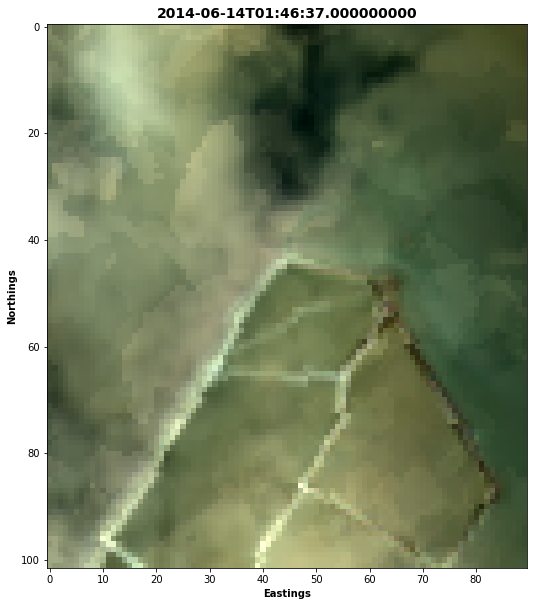

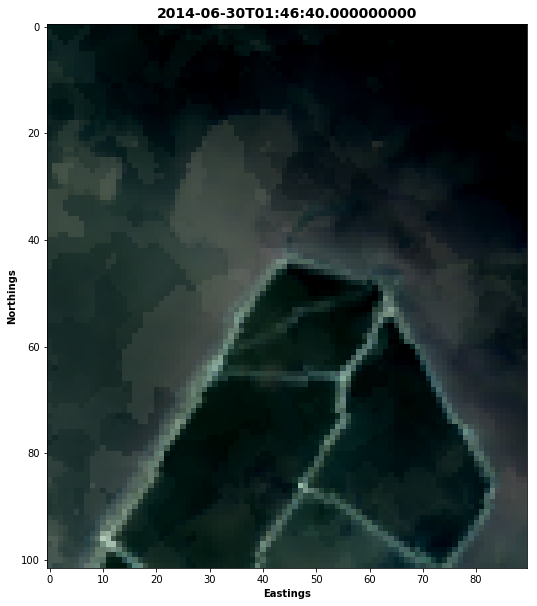

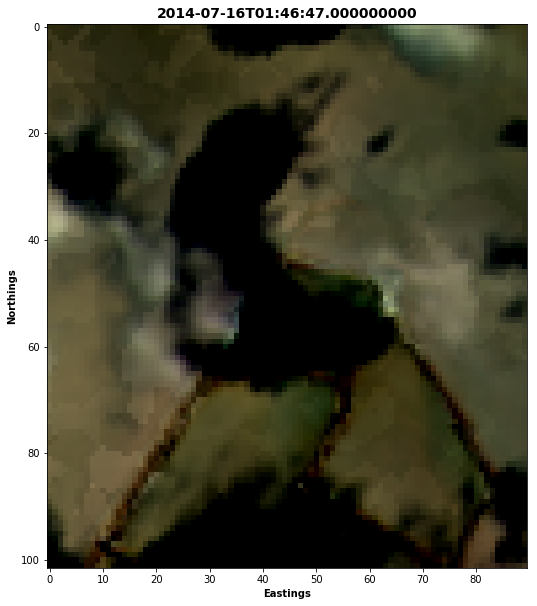

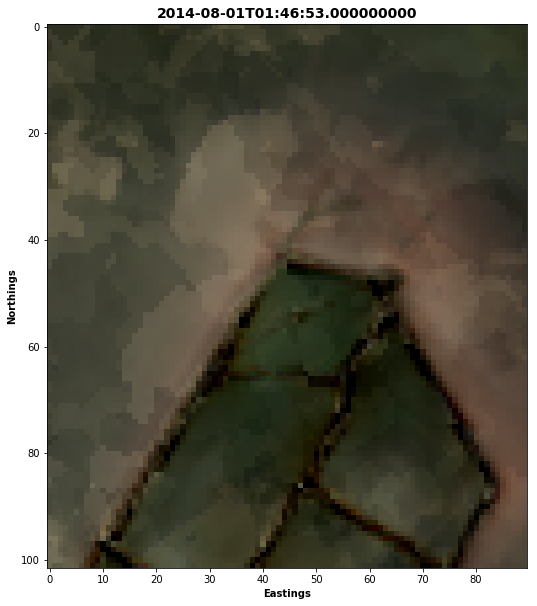

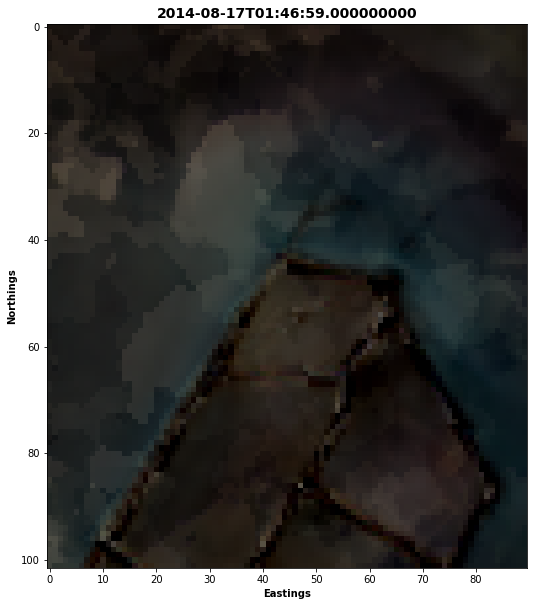

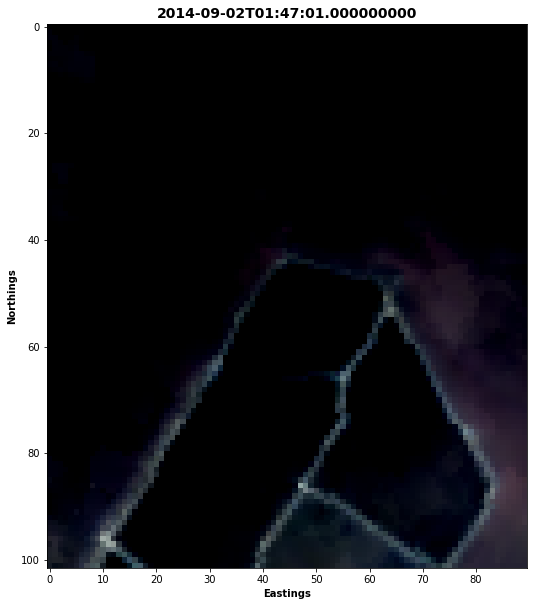

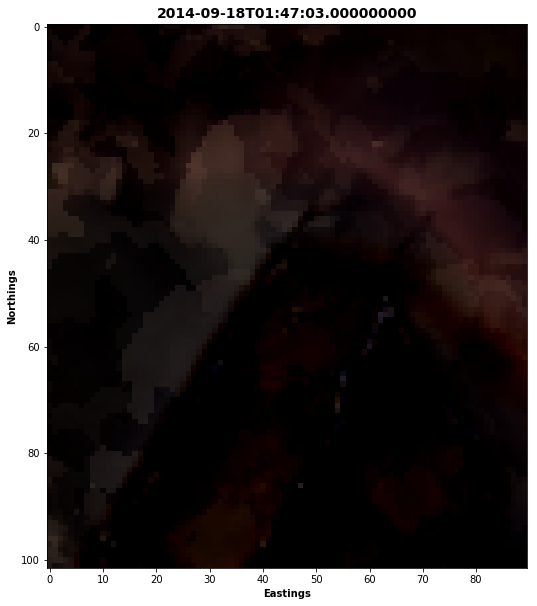

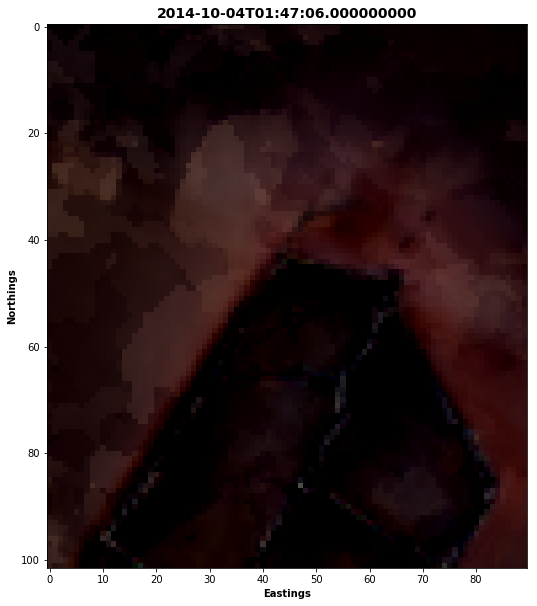

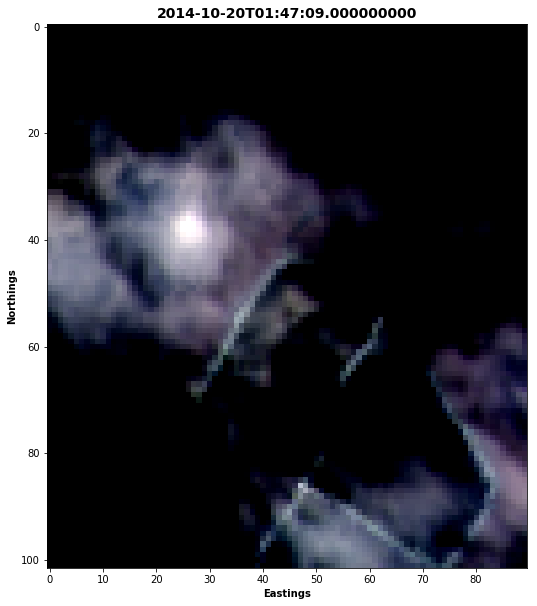

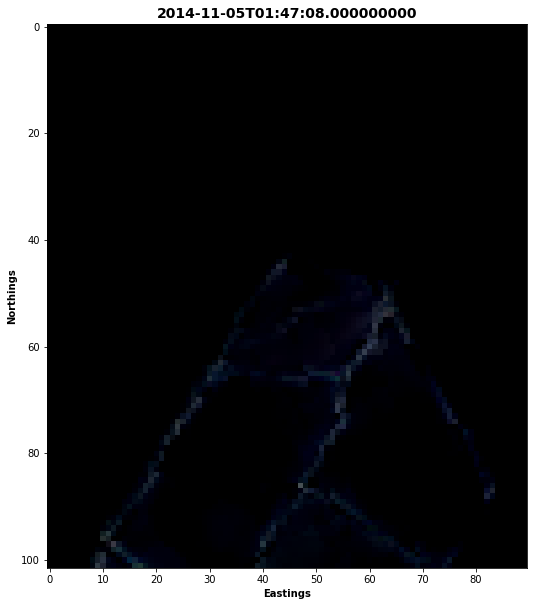

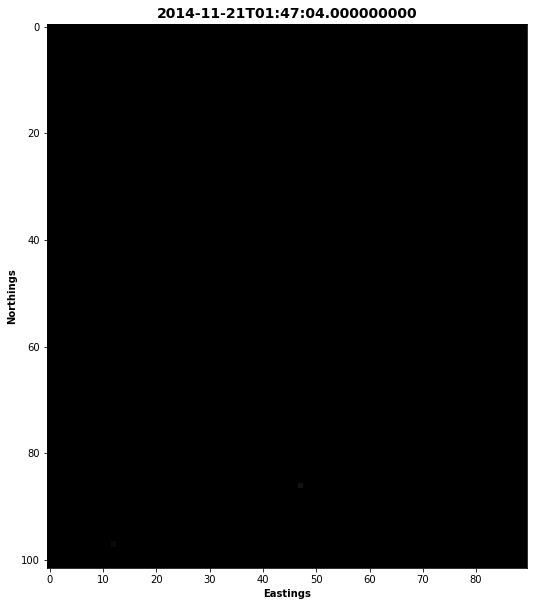

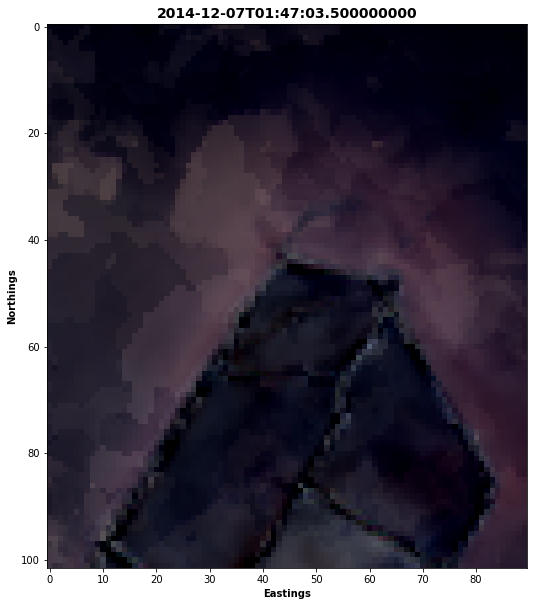

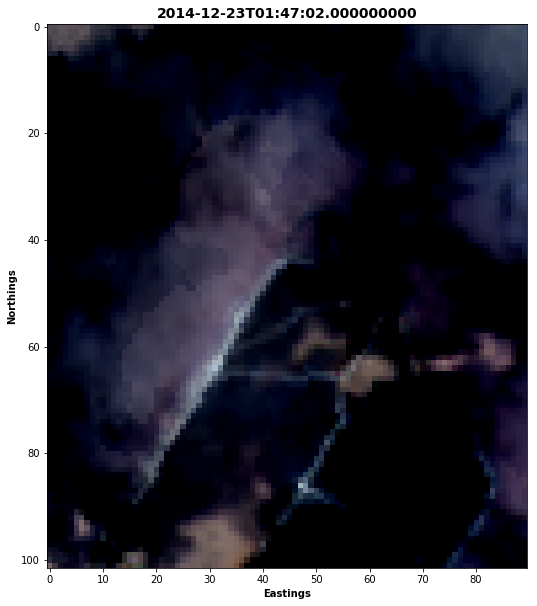

In [12]:
#fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(11.5, 9.5))
#plt.tight_layout(pad=5.5, w_pad=4.5, h_pad=2.5)

for i in range(len(sat_array['time'])):
    DEAPlotting.three_band_image(diffo, bands = ['red', 'green', 'blue'], time = i, contrast_enhance=False)
